In [163]:
import pandas as pd
import numpy as np

In [164]:
from scipy import spatial

In [165]:
import pickle

In [166]:
from astropy.table import Table
from astropy.cosmology import LambdaCDM as Cos

In [167]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [168]:
with open("sweep-000m005-010p000_trim.pkl", "rb") as f:
    ra_dec = pickle.load(f)

In [169]:
ra_dec = ra_dec[np.logical_and(22.5 - 2.5*np.log10(ra_dec.FLUX_Z)<21, ra_dec.z_phot_median>0.1)]

In [170]:
ra_dec["RA_r"] = (np.pi/180)*ra_dec["RA"]
ra_dec["DEC_r"] = (np.pi/180)*ra_dec["DEC"]

In [171]:
oversample = 1
gauss = ra_dec.sample(n = int(oversample*len(ra_dec)), replace = True)
random1 = np.random.normal(loc = 0, scale = 1, size = int(oversample*len(ra_dec)))
gauss["z_phot_median"] = gauss["z_phot_median"] + random1*gauss["z_phot_std"]

In [228]:
bins = np.arange(0.1, ra_dec.z_phot_median.max(), 0.01)
binned = [ra_dec[np.logical_and(ra_dec.z_phot_median>=i-.03, ra_dec.z_phot_median<=i+.03)] for i in bins]
bins_g = np.arange(0.1, ra_dec.z_phot_median.max(), 0.01)
binned_g = [gauss[np.logical_and(gauss.z_phot_median>=i-.03, gauss.z_phot_median<=i+.03)] for i in bins]

In [229]:
cos = Cos(H0 = 70, Om0 = .286, Ode0 = .714)

In [230]:
for i in range(0, len(binned)):
    mean = binned[i].z_phot_median.mean()
    binned[i]["z"] = cos.comoving_distance(mean)*np.ones(len(binned[i]))
    binned[i]["y"] = cos.comoving_distance(mean)*binned[i]["DEC_r"]
    binned[i]["x"] = cos.comoving_distance(mean)*binned[i]["RA_r"]*np.cos(binned[i]["DEC_r"])
for i in range(0, len(binned_g)):
    mean = binned[i].z_phot_median.mean()
    binned_g[i]["z"] = cos.comoving_distance(mean)*np.ones(len(binned_g[i]))
    binned_g[i]["y"] = cos.comoving_distance(mean)*binned_g[i]["DEC_r"]
    binned_g[i]["x"] = cos.comoving_distance(mean)*binned_g[i]["RA_r"]*np.cos(binned_g[i]["DEC_r"])

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A va

In [14]:
binned_g[40].head(10)

,z_phot_median,z_phot_std,mass,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,MASKBITS,RA_r,DEC_r,z,y,x
4102770,0.498848,0.087452,10.533484,8000,328929,0003m002,1453,EXP,0.364594,-0.326073,2.776671,7.645283,13.316778,19.528975,0,0.006363,-0.005691,1896.627981,-10.793791,12.068742
5418654,0.523309,0.054348,10.999082,8000,326053,0013m007,153,DEV,1.324800,-0.869436,0.209879,1.504040,5.576216,19.523048,0,0.023122,-0.015175,1896.627981,-28.780408,43.849008
133562,0.496804,0.077154,10.967519,8000,315994,0066m025,2478,DEV,6.578724,-2.533484,1.268505,4.415905,11.349629,30.386585,0,0.114820,-0.044218,1896.627981,-83.864423,217.558708
809447,0.478498,0.023416,10.730525,8000,310222,0026m035,1277,REX,2.695436,-3.590670,0.368859,2.198276,6.098557,10.646770,0,0.047044,-0.062669,1896.627981,-118.859790,89.050264
958019,0.510900,0.026088,10.990229,8000,311660,0026m032,3134,DEV,2.610988,-3.275345,0.495525,2.966606,8.998146,19.112547,0,0.045570,-0.057166,1896.627981,-108.421785,86.288800
3253939,0.509027,0.071553,10.845756,8000,314564,0091m027,5131,EXP,9.205515,-2.718849,1.118654,3.844985,9.674104,23.643946,0,0.160667,-0.047453,1896.627981,-90.000447,304.381634
1424435,0.481415,0.079997,10.407046,8000,326076,0071m007,685,DEV,7.062523,-0.851938,0.975146,3.487723,7.133394,7.767462,0,0.123264,-0.014869,1896.627981,-28.201185,233.760624
953316,0.471225,0.084729,10.068578,8000,328936,0021m002,4588,EXP,2.073784,-0.193838,1.631105,3.873083,6.833710,7.057839,0,0.036194,-0.003383,1896.627981,-6.416488,68.646843
2806869,0.516331,0.020543,11.156151,8000,304500,0096m045,653,DEV,9.718960,-4.600102,0.723956,4.203418,12.830256,31.487614,0,0.169628,-0.080287,1896.627981,-152.274435,320.684597
3795764,0.515390,0.057550,11.432158,8000,303043,0043m047,6763,DEV,4.463446,-4.662265,4.602618,18.298342,45.469757,82.397026,0,0.077902,-0.081372,1896.627981,-154.332182,147.261911


In [251]:
sample_real = binned[180]
massive_sample = sample_real[sample_real.mass>11]
massive_tree = spatial.cKDTree(massive_sample[["x", "y"]])
sample = binned_g[140]
tree = spatial.cKDTree(sample[["x", "y"]])

## KDE

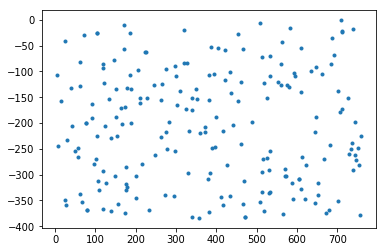

In [252]:
plt.plot(sample.x, sample.y, ".", alpha = 1)

In [204]:
from sklearn.neighbors import KernelDensity
locations = np.array([sample.x.to_numpy(), sample.y.to_numpy()]).T
kde = KernelDensity(kernel='tophat', bandwidth=4).fit(locations)

In [178]:
"""
X = np.linspace(min(sample.x.to_numpy()), max(sample.x.to_numpy()), 200)
Y = np.linspace(min(sample.y.to_numpy()), max(sample.y.to_numpy()), 200)
x, y = np.meshgrid(X, Y)
xy = np.vstack([x.flatten(), y.flatten()]).T
z = np.exp(kde.score_samples(xy))
Z = np.reshape(z, x.shape)"""

'\nX = np.linspace(min(sample.x.to_numpy()), max(sample.x.to_numpy()), 200)\nY = np.linspace(min(sample.y.to_numpy()), max(sample.y.to_numpy()), 200)\nx, y = np.meshgrid(X, Y)\nxy = np.vstack([x.flatten(), y.flatten()]).T\nz = np.exp(kde.score_samples(xy))\nZ = np.reshape(z, x.shape)'

In [179]:
"""
plt.figure(figsize = (10, 6))
plt.imshow(Z, origin = "lower")
plt.show()"""

'\nplt.figure(figsize = (10, 6))\nplt.imshow(Z, origin = "lower")\nplt.show()'

In [180]:
kde = KernelDensity(kernel='gaussian', bandwidth=4).fit(locations)

In [181]:
xy = np.vstack([massive_sample.x, massive_sample.y]).T
z = np.exp(kde.score_samples(xy))

In [182]:
massive_sample["kde"] = z
massive_sample.head()

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,z_phot_median,z_phot_std,mass,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,...,FLUX_R,FLUX_Z,FLUX_W1,MASKBITS,RA_r,DEC_r,z,y,x,kde
1184,0.876019,0.059285,11.316773,8000,328953,0063m002,1253,DEV,6.329999,-0.330620,...,2.382962,10.579239,46.977299,0,0.110479,-0.005770,3072.395454,-17.728978,339.430504,0.000010
1382,0.907607,0.063248,11.015264,8000,328953,0063m002,1452,REX,6.313620,-0.323154,...,2.065596,7.479989,34.291687,0,0.110193,-0.005640,3072.395454,-17.328622,338.552495,0.000010
2228,0.873495,0.049111,11.338922,8000,328953,0063m002,2320,DEV,6.345886,-0.294393,...,1.115698,6.642397,27.408258,0,0.110757,-0.005138,3072.395454,-15.786355,340.283573,0.000010
3168,0.890992,0.076881,11.133813,8000,328953,0063m002,3276,REX,6.294969,-0.263704,...,0.823446,4.766947,17.175411,0,0.109868,-0.004603,3072.395454,-14.140722,337.554155,0.000011
4922,0.904708,0.082565,11.225204,8000,328953,0063m002,5056,EXP,6.292684,-0.196517,...,2.022307,8.362506,37.992779,0,0.109828,-0.003430,3072.395454,-10.537889,337.433234,0.000012


## Nearest Neighbors

In [233]:
r = 2
neighbors = massive_tree.query_ball_tree(tree, r)

In [234]:
print(type(neighbors))

<class 'list'>


In [235]:
counts = np.array([])
for i in range(0, len(neighbors)):
    counts = np.append(counts, len(neighbors[i]))

In [236]:
#Is resetting the index necessary?
sample.reset_index(inplace=True)
massive_sample.reset_index(inplace=True)
massive_sample["neighbor_numbers"] = pd.Series(neighbors)
massive_sample["neighbors"] = pd.Series(counts)

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [237]:
#Need to subtract log(oversample)
masses = 10**sample.mass
massive_sample["neighbor_mass"] = np.zeros(len(massive_sample))
for i in range (0, len(massive_sample)):
    massive_sample["neighbor_mass"][i] = np.log10(np.sum(masses[massive_sample.neighbor_numbers[i]]))
    
reds = sample.z_phot_median
massive_sample["mean_red"] = np.zeros(len(massive_sample))
for i in range (0, len(massive_sample)):
    massive_sample["mean_red"][i] = np.mean(reds[massive_sample.neighbor_numbers[i]])
    
massive_sample["med_red"] = np.zeros(len(massive_sample))
for i in range (0, len(massive_sample)):
    massive_sample["med_red"][i] = np.median(reds[massive_sample.neighbor_numbers[i]])

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/

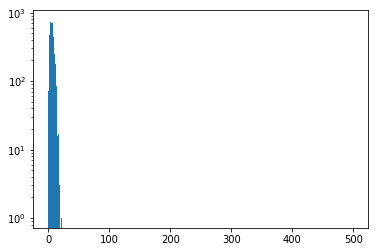

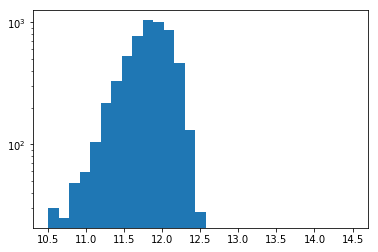

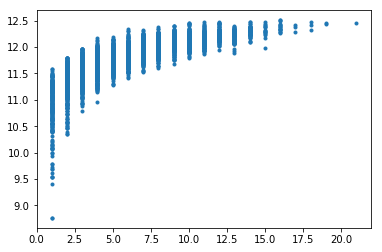

In [238]:
plt.hist(counts, bins = np.arange(0, 500), log = True)
plt.show()
plt.hist(massive_sample.neighbor_mass, bins = np.linspace(10.5, 14.5, 30), log = True)
plt.show()
plt.plot(counts, massive_sample.neighbor_mass, ".")
plt.show()

## Nearest Neighbors Clusters

In [239]:
clusters = massive_sample[massive_sample.neighbors>25] #May need to change this once you start doing slices at other redshifts
printing = clusters[["RA", "DEC", "x", "y", "z_phot_median", "mass", "neighbor_mass"]].sample(n=10)
printing.head(100)
#clusters = massive_sample[massive_sample.neighbor_mass>14]
#print(clusters[["RA", "DEC", "z_phot_median", "mass", "neighbor_mass"]])

ValueError: Cannot take a larger sample than population when 'replace=False'

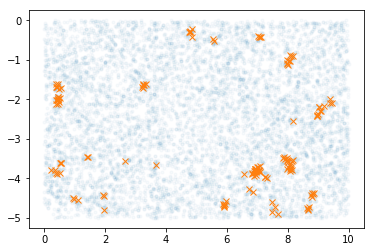

In [190]:
plt.plot(sample.RA, sample.DEC, ".", alpha = .03)
plt.plot(clusters[["RA"]], clusters[["DEC"]], "x")
plt.show()

In [191]:
clusters.head(10)

,index,z_phot_median,z_phot_std,mass,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,...,DEC_r,z,y,x,kde,neighbor_numbers,neighbors,neighbor_mass,mean_red,med_red
178,167590,0.919849,0.083974,11.215795,8000,305925,0068m042,1209,DEV,6.849895,...,-0.075621,3072.395454,-232.336124,366.265055,0.000013,"[231, 310, 724, 1016, 1166, 1427, 1989, 2771, ...",26.0,12.573520,0.902168,0.907361
232,230053,0.913831,0.092846,11.164930,8000,305924,0066m042,3705,EXP,6.720375,...,-0.074389,3072.395454,-228.553063,359.372823,0.000013,"[310, 421, 1016, 1166, 1699, 2034, 2842, 2987,...",26.0,12.573045,0.900198,0.900888
246,241170,0.893571,0.078548,11.051089,8000,307362,0066m040,7052,DEV,6.550170,...,-0.067866,3072.395454,-208.511678,350.433910,0.000012,"[773, 1009, 2024, 2101, 2439, 2680, 3345, 3485...",26.0,12.453906,0.902196,0.903217
357,342952,0.871790,0.044296,11.247249,8000,308801,0068m037,237,DEV,6.907489,...,-0.067553,3072.395454,-207.548730,369.558353,0.000019,"[62, 375, 420, 602, 712, 762, 972, 1370, 1393,...",30.0,12.596296,0.897480,0.896272
358,343321,0.899048,0.055479,11.260425,8000,308801,0068m037,606,REX,6.832088,...,-0.067336,3072.395454,-206.882495,365.529646,0.000017,"[375, 420, 602, 712, 762, 1370, 1393, 1834, 21...",26.0,12.560785,0.896811,0.894400
360,343706,0.910835,0.072992,11.426271,8000,308801,0068m037,993,DEV,6.960666,...,-0.067023,3072.395454,-205.921014,372.416679,0.000018,"[62, 420, 602, 762, 972, 1202, 1370, 1403, 158...",30.0,12.593700,0.899535,0.896705
361,344300,0.889335,0.048876,11.282375,8000,308801,0068m037,1604,DEV,6.931997,...,-0.066676,3072.395454,-204.854724,370.891376,0.000019,"[62, 420, 602, 712, 762, 972, 1202, 1370, 1393...",30.0,12.574122,0.899435,0.896705
362,344419,0.900884,0.062888,11.194313,8000,308801,0068m037,1723,EXP,6.961706,...,-0.066586,3072.395454,-204.579626,372.483174,0.000018,"[62, 420, 602, 762, 972, 1202, 1370, 1403, 158...",29.0,12.553993,0.899717,0.898024
363,344524,0.872835,0.052614,11.156807,8000,308801,0068m037,1829,REX,6.896314,...,-0.066548,3072.395454,-204.460407,368.985375,0.000018,"[62, 420, 602, 712, 762, 1370, 1393, 1403, 158...",27.0,12.547651,0.900282,0.898024
364,344666,0.910399,0.054300,11.235032,8000,308801,0068m037,1976,EXP,6.913586,...,-0.066435,3072.395454,-204.115295,369.912278,0.000018,"[62, 420, 602, 712, 762, 972, 1202, 1370, 1393...",29.0,12.564251,0.899042,0.895387


In [192]:
cluster_tree = spatial.cKDTree(clusters[["x", "y"]])
cluster_tree2 = spatial.cKDTree(clusters[["x", "y"]].copy())
r = 2
neighbors_c = cluster_tree.query_ball_tree(cluster_tree2, r)
clusters.reset_index(inplace= True)
clusters.drop(columns = ["neighbor_numbers"])
clusters["neighbor_numbers"] = pd.Series(neighbors_c)
print(type(neighbors_c))
print(len(clusters))

<class 'list'>
142


/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [193]:
clusters.head()

,level_0,index,z_phot_median,z_phot_std,mass,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,...,DEC_r,z,y,x,kde,neighbor_numbers,neighbors,neighbor_mass,mean_red,med_red
0,178,167590,0.919849,0.083974,11.215795,8000,305925,0068m042,1209,DEV,...,-0.075621,3072.395454,-232.336124,366.265055,0.000013,"[0, 1]",26.0,12.573520,0.902168,0.907361
1,232,230053,0.913831,0.092846,11.164930,8000,305924,0066m042,3705,EXP,...,-0.074389,3072.395454,-228.553063,359.372823,0.000013,"[0, 1]",26.0,12.573045,0.900198,0.900888
2,246,241170,0.893571,0.078548,11.051089,8000,307362,0066m040,7052,DEV,...,-0.067866,3072.395454,-208.511678,350.433910,0.000012,[2],26.0,12.453906,0.902196,0.903217
3,357,342952,0.871790,0.044296,11.247249,8000,308801,0068m037,237,DEV,...,-0.067553,3072.395454,-207.548730,369.558353,0.000019,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, ...",30.0,12.596296,0.897480,0.896272
4,358,343321,0.899048,0.055479,11.260425,8000,308801,0068m037,606,REX,...,-0.067336,3072.395454,-206.882495,365.529646,0.000017,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18]",26.0,12.560785,0.896811,0.894400


In [194]:
#Make this in 3D with slices (need to scale neighbors by redshift as above)
clusters.sort_values("mass", inplace = True)
clusters["ncluster"] = np.zeros(len(clusters))
sample["ncluster"] = np.zeros(len(sample))
clusternum = 1

for index, gal in clusters.iterrows():
    if gal.ncluster == 0:
        gal.ncluster = clusternum
        for index2 in gal.neighbor_numbers:
            if clusters.at[index2, "ncluster"] == 0:
                clusters.at[index2, "ncluster"] = clusternum
        clusternum+=1

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to

In [195]:
print(clusters.ncluster)

28      1.0
84      2.0
63      3.0
50      4.0
133     5.0
       ... 
57     36.0
115     6.0
55      3.0
31     89.0
22     56.0
Name: ncluster, Length: 142, dtype: float64


In [196]:
most_massive = clusters.sort_values(by = ['ncluster','mass'], ascending = False).groupby('ncluster').head(1)
printing = most_massive[["RA", "DEC", "x", "y", "z_phot_median", "mass", "neighbor_mass"]]#.sample(n=20)
printing.sort_values("neighbor_mass", inplace = True)
printing.head(20)

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,RA,DEC,x,y,z_phot_median,mass,neighbor_mass
109,0.540619,-3.619108,28.932043,-194.068952,0.896079,11.341642,12.422254
89,9.186715,-2.166555,492.270917,-116.178075,0.877083,11.254532,12.429863
122,0.471821,-1.739163,25.288991,-93.259878,0.876342,11.516220,12.438823
2,6.550170,-3.888444,350.433910,-208.511678,0.893571,11.051089,12.453906
141,1.107478,-4.536413,59.200693,-243.257957,0.926307,11.220286,12.455850
48,3.250909,-1.712155,174.247032,-91.811615,0.885656,11.433323,12.456344
131,5.901590,-4.690472,315.403569,-251.519149,0.908580,11.493200,12.483180
72,8.636505,-4.750516,461.527978,-254.738890,0.907438,11.440416,12.489110
82,8.143118,-3.560212,435.819101,-190.910739,0.916761,11.311494,12.490364
101,0.513182,-3.853937,27.456360,-206.661246,0.910504,11.407148,12.504019


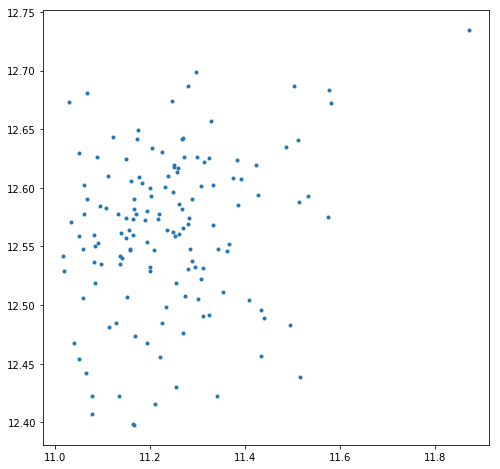

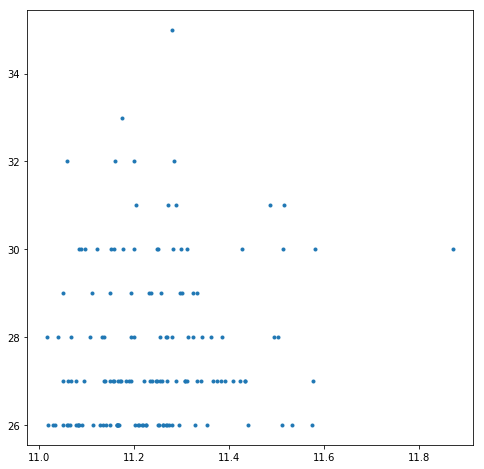

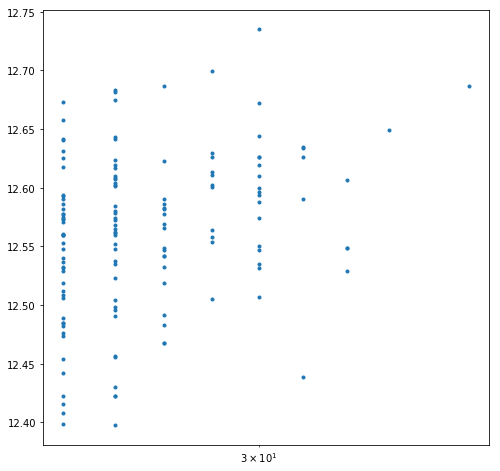

In [197]:
plt.figure(figsize = (8, 8))
plt.plot(clusters.mass, clusters.neighbor_mass, ".")
plt.show()
plt.figure(figsize = (8, 8))
plt.plot(clusters.mass, clusters.neighbors, ".")
plt.show()
plt.figure(figsize = (8, 8))
plt.semilogx(clusters.neighbors, clusters.neighbor_mass, ".")
plt.show()

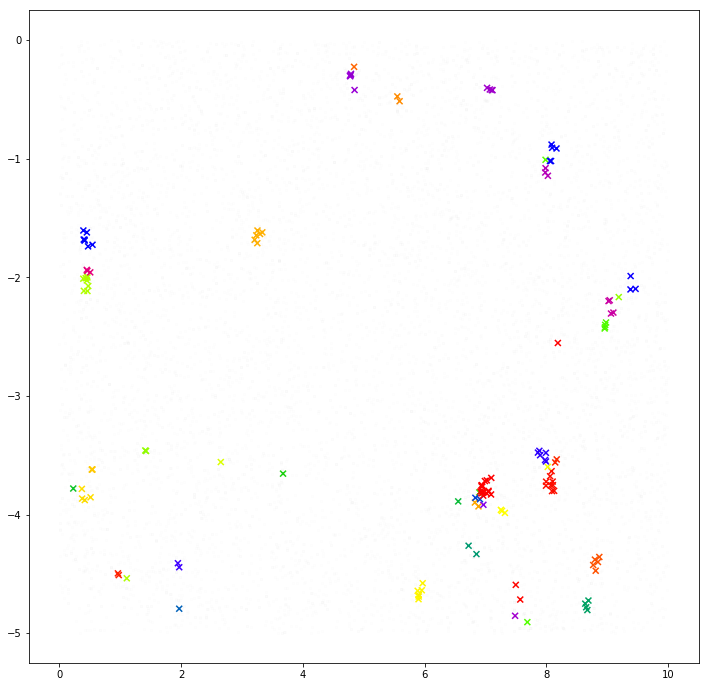

In [198]:
plt.figure(figsize = (12, 12))
plt.plot(sample.RA, sample.DEC, ".", alpha = .005)
color = np.array(clusters[["ncluster"]])*10
plt.scatter(np.array(clusters[["RA"]]), np.array(clusters[["DEC"]]), marker = "x", c = color, cmap = "prism")
#plt.xlim(8, 9)
#plt.ylim(-1, -2)
plt.show()

## KDE Clusters

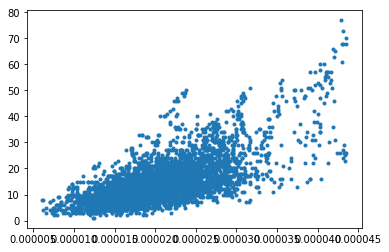

In [31]:
plt.plot(massive_sample.kde, massive_sample.neighbors, ".")
plt.show()

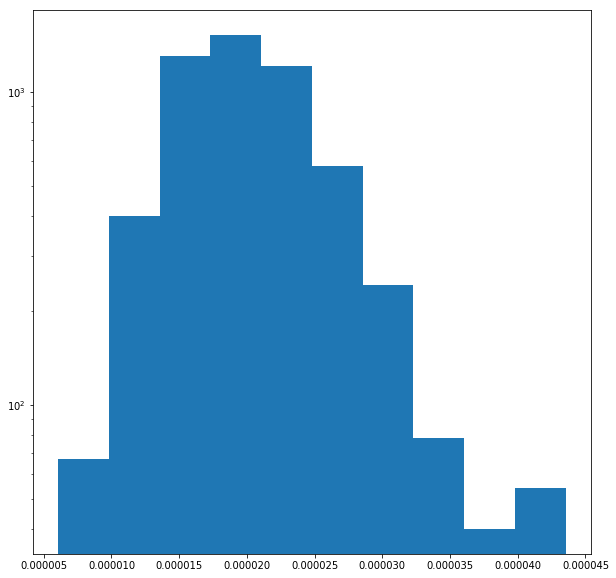

In [32]:
plt.figure(figsize = (10, 10))
plt.hist(massive_sample.kde, log = True)
plt.show()

In [33]:
clusters = massive_sample[massive_sample.kde>0.00004]
printing = clusters[["RA", "DEC"]].sample(n=10)
printing.head(100)

,RA,DEC
2598,8.719883,-3.043524
256,6.690678,-4.352677
259,6.654905,-4.326837
632,6.474261,-4.327248
2617,8.692311,-2.947400
264,6.696380,-4.303792
637,6.491526,-4.296268
2610,8.658873,-3.017270
2596,8.732870,-3.059533
263,6.740154,-4.306014


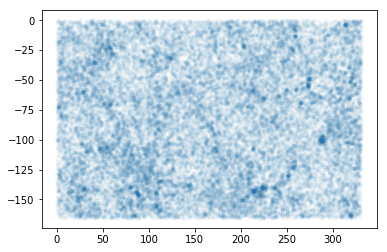

In [35]:
plt.plot(sample.x, sample.y, ".", alpha = .03)

# Outline
Data cleaning:

✓ 1. Merge dataframes (done in Trim_data)

✓ 2. Remove rows with negative masses, point sources, low luminosities, and other flags (done in Trim_data)

Coordinate transformation:

✓ 1. import astropy cosmology

✓ 2. zcoord = cos.comoving_distance(z)

✓ 3. ycoord = cos.comoving_transverse_distance(z) * dec (need ra and dec in radians)

✓ 4. xcoord = cos.comoving_transverse_distance(z) * ra * np.cos(dec) (need ra and dec in radians)


Plotting:

✓ 1. 2-D Plots

✓ 2. Plot x vs y vs z in 3d matplotlib for (For whole sky, range of z xrange(0, 2pi times 3000 Mpc) yrange(-3000 times pi, 3000 times pi) zrange(0, 3000) ie redshift 0 to 1)


KDTree:

✓ 1. Import spatial

2. tree_massive = spatial.KDTree(data(massive)) or cKDTree can work
3. tree = spatial.KDTree(data)
4. Decide on a value for r: r = cartesian distance (divide z by some factor to make an ellipsoid as opposed to a sphere due to uncertainty in redshift direction)
5. counts = tree_massive.count_neighbors(tree, r) 

Finding clusters:
1. Order by max values from count_neighbor
2. 


Notes:
1. Try full sample
2. Try measuring total mass of all neighbors (need to do log10(10^mass1 + 10^mass2 etc))
3. Try r = 2 or r = 3 (radius)
4. On DARA: generate extra objects from gaussian with sigma = uncertainty in z (smearing out the object) (use np.random.normal package from monte carlo)

Todo:

1. Try cKDTree
2. Create masses
3. Slice along z: Begin slicing by delta = 0.01 z intervals. The width of the interval should be -3delta to 3delta. Need to recreate x and y from the middle value of z for that slice. Then do cKDTree or Kernel density estimate (can use masses as weights). We need to convert to overdensity calculation from neighbors/(mean density of neighbors in slice) for each galaxy. Histogram of overdensity to find cutoff. 

To Do:

1. Find the highest density object
2. Mark all objects within cluster radius
3. Find next highest density object that hasn't been marked
4. Friends of friends, watershed

To Do:

0. Find median/mean redshift of neighbors the way we did mass
1. Find the most massive galaxy for each cluster (and use this in viewer)
2. Generate gaussian for sample ONLY
3. Adjust r parameter as necessary
4. Loop over all the slices